<a href="https://colab.research.google.com/github/Marckhz/ml-uas/blob/main/NLP_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import joblib
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marckhi","key":"b359a1a4cb50efd07267f163f01c3709"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

 93% 224M/242M [00:01<00:00, 117MB/s]
100% 242M/242M [00:01<00:00, 128MB/s]


In [6]:
!ls

amazon-fine-food-reviews.zip  kaggle.json  sample_data


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('amazon-fine-food-reviews.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [10]:
tfidf_params = {'stop_words':stopwords.words('english')}
pipe = Pipeline(
    steps=[
        ('tfidf', TfidfVectorizer(**tfidf_params)),
        ('classifier', LogisticRegression() )
    ]
)

In [11]:
df = pd.read_csv('files/Reviews.csv')

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#above 3 is positive
#below 3 is negative

In [13]:
mod_df = df.copy()

In [14]:
mod_df['sentiment'] = mod_df['Score'].apply(lambda x: 'pos' if x > 3 else 'neg')

In [15]:
mod_df.Text.iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [16]:
X_train, x_test, y_train, y_test = train_test_split(mod_df['Text'], mod_df['sentiment'], random_state=42, test_size=.2)

In [17]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you...
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegres

In [38]:
x_test_transform = pipe.predict(x_test)

In [41]:
cr = classification_report(x_test_transform, y_test,output_dict=True, )

In [20]:
print(cr)

              precision    recall  f1-score   support

         neg       0.68      0.82      0.75     20565
         pos       0.96      0.92      0.94     93126

    accuracy                           0.90    113691
   macro avg       0.82      0.87      0.84    113691
weighted avg       0.91      0.90      0.90    113691



In [73]:
report_df = pd.DataFrame(cr).T
report_df['support'] = report_df.support.apply(lambda x : x / 10000 )

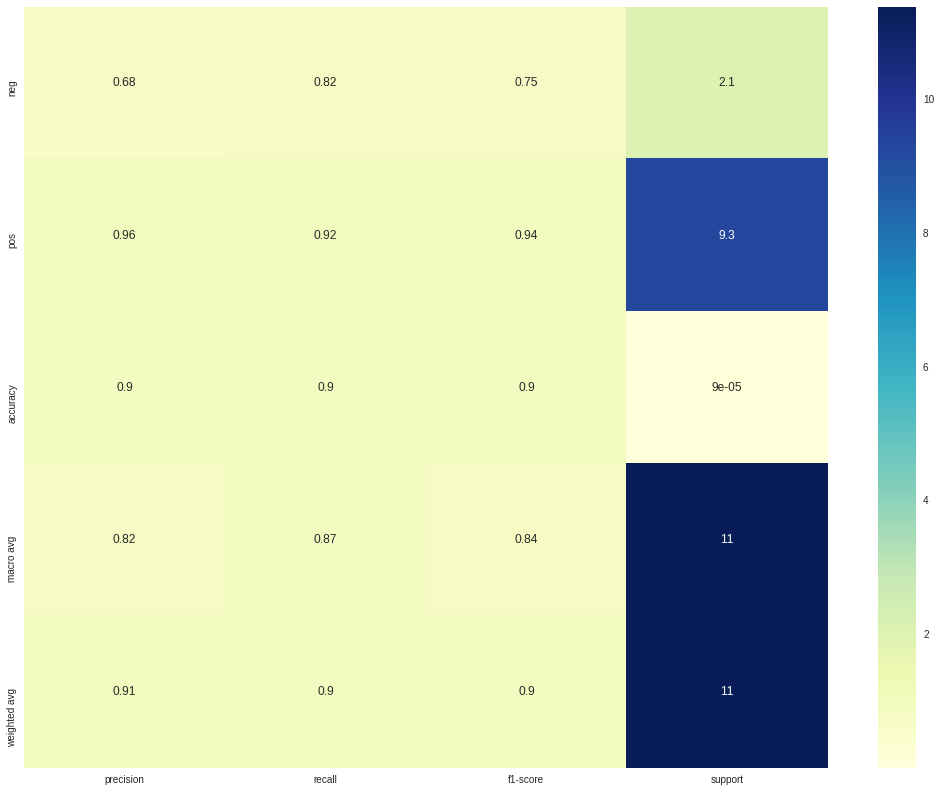

In [77]:
plt.figure(figsize=(18,14))
sns.heatmap(report_df, annot=True, cmap="YlGnBu")

In [ ]:
test_review_pos = 'i find this product awesome, i love it. It is very useful. I will definitely will recommend.'
test_review_neg = 'this product sucks. I really hate it. Expensive and bad quality.'

In [ ]:
pipe.predict([test_review_pos])

array(['pos'], dtype=object)

In [ ]:
pipe.predict([test_review_neg])

array(['neg'], dtype=object)

In [ ]:
joblib.dump(pipe, 'dummy_model.pkl')

AttributeError: ignored